In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
address="/content/drive/My Drive/videos/level-0/IMG_4910.mp4"
dest_address='/content/drive/My Drive/'+address[31:len(address)-4]
print(dest_address)

/content/drive/My Drive/level-0/IMG_4910


In [ ]:
def resizeMe(gray):
  scale_percent = 5 # percent of original size
  width = 54
  height = 96
  dim = (width, height)
  resized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
  return resized

In [ ]:
def getFrameDiffDict(dataset):
  pixeldataset={}
  for i in range(0,len(dataset)-1):

    arr=dataset.get(i)
    arr1=dataset.get(i+1)
    arr2 = np.empty_like(arr) 
    for row in range(0,arr.shape[0]):
      for col in range(0,arr.shape[1]):
        arr2[row][col]=arr1[row][col]-arr[row][col]
    
    pixeldataset[i]=arr2
  return pixeldataset

In [ ]:
def flattenNpArr(pixeldataset):
  finalArray = np.arange(96*54)
  # print(finalArray)
  # print("finalArray shape=",finalArray.shape)


  for i in range(0,len(pixeldataset)):
    eachFrameDiff=pixeldataset[i]
    result = (np.array(eachFrameDiff)).flatten()
    # print(result.shape) 
    finalArray=np.concatenate((finalArray, result), axis=0)
  
  return finalArray


In [ ]:
def calcPercentFlicker(maxB,minB):
  return (maxB-minB)/(maxB+minB)

In [ ]:
import matplotlib.pyplot as plt

def displayPercentBrightness(lst):
  x=list(range(1,len(lst)+1))
  y1=lst
  fig, ax = plt.subplots()
  for item in [fig, ax]:
      item.patch.set_visible(False)
  # with open('test.png', 'w') as outfile:
  #     fig.canvas.print_png(outfile)
  plt.plot(x, y1, label="percent brightness for all pixels",color='red')
  # plt.plot()

  plt.xlabel("Pixel number")
  plt.ylabel("Pixel brightness")
  plt.title("Frame number ")
  plt.tight_layout()

  plt.legend()
  plt.show()
  

In [ ]:
def calcAvg(lst):
  print("list for percent brightness",lst)
  displayPercentBrightness(lst)
  s=0
  for each in lst:
    s=s+each
  return s/len(lst)

In [ ]:
def findBrightness(dataset):
  rdPixel=[]
  xlength=len(dataset.get(0))
  ylength=len(dataset.get(0)[0])

  for each in dataset:
    for i in range(0,xlength):
      rdPixel1=[]
      for j in range(0,ylength):
        rdPixel1.append((int)(dataset.get(each)[i][j]))
      rdPixel.append(rdPixel1)
  pflickerlst=[]
  for each in rdPixel:
    maxB=max(each)
    minB=min(each)
    pflicker=calcPercentFlicker(maxB,minB)
    pflickerlst.append(pflicker)

  # print(pflickerlst)
  # print("length of flicke rlst",len(pflickerlst))
  percentBrightness=calcAvg(pflickerlst)
  # print("percent brightness is",percentBrightness)
  return percentBrightness

In [ ]:
global percentBrightness
def runTestDataProcessing(address):
  numOfFrames=10
  allVideosResult=np.zeros((10))
  lst=[]
  cam = cv2.VideoCapture(address)
  fps = cam.get(cv2.CAP_PROP_FPS)
      
  currentframe = 0
  dataset = {}
  # flag=1
  print("is cam opened=",cam.isOpened())
  key=0
  while cam.isOpened():
    print("True")
    ret, frame = cam.read()
    if not ret:
      print("Can't receive frame (stream end?). Exiting ...")
      break 
    currentframe += 1
    timestamp=currentframe/fps
    
    # img=cv2.imread(frame)
    img= cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img=cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
    # cv2_imshow(img)
    # print(img.shape)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray=cv2.rotate(gray,cv2.ROTATE_90_CLOCKWISE)
    print(gray.shape)

    resized=resizeMe(gray)
    # cv2_imshow(gray)


    # print("resized shape=",resized.shape)
    # cv2_imshow(resized)
    frame1=resized.copy()
    dataset[key] = frame1
    key=key+1
    if cv2.waitKey(1) == ord('q'):
      break
    if currentframe==numOfFrames:
      break

  cam.release()
  cv2.destroyAllWindows()


  pixeldataset = {}
  # print("num of frames i took",len(dataset))
  visualiseDataset(dataset)
  #we have got each frame here in a dictionary dataset
  #get difference between corresponding frames in dictionary pixeldataset
  percentBrightness=findBrightness(dataset)
  pixeldataset=getFrameDiffDict(dataset)
  # print("length is",len(pixeldataset))
  #flattening each frame differenceinto 1d in one row and then putting them into one finalResult
  finalArray=flattenNpArr(pixeldataset)
  finalResult = np.reshape(finalArray,(5184,10))
  # print("finalArr shape before=",finalResult.shape)
  finalResult=finalResult[1:]
  for i in range(0,len(finalResult)):
    lst.append(finalResult[i].tolist())


  allVideosResult=np.array(lst) #each row is a row of difference of values between two frames and all the rows combine to make all the frames in all the videos


  np.savetxt("test.txt", allVideosResult,delimiter=',',fmt = '%.1f')
  # print("final shape of allvideos result=",allVideosResult.shape)
  return allVideosResult

In [ ]:
import matplotlib.pyplot as plt

def visualiseDataset(dataset):
  # print(dataset.shape)
  # print(dataset)
  flatlst=flattenNpArr(dataset)
  print(dataset.get(0).shape)
  print("^")
  print(flatlst)
  print(len(flatlst))
  print(flatlst.shape)
  x=list(range(1,96*54+1))
  k=1
  i=96*54
  j=96*54*2
  while k<11:
    y1=flatlst[i:j]
    i=j
    j=j+96*54
    fig, ax = plt.subplots()
    ax.plot(range(10))

    for item in [fig, ax]:
        item.patch.set_visible(False)

    # with open('test.png', 'w') as outfile:
    #     fig.canvas.print_png(outfile)
    plt.plot(x, y1, label="Frame visualisation",color='red')
    # plt.plot()

    plt.xlabel("Pixel number")
    plt.ylabel("Value of Pixel in gray scale")
    plt.title("Frame number ")
    plt.tight_layout()
    k=k+1
    plt.legend()
    plt.show()
    


In [ ]:
def fnDataProcessing(videoName,level,flag):
  numOfFrames=10
  allVideosResult=np.zeros((10))
  lst=[]
  testAllVideosResult=np.array(lst)
  if flag==False:
    testaddress="/content/drive/My Drive/videos/testFolder/test1.MOV"
    testAllVideosResult=runTestDataProcessing(testaddress)
    return testAllVideosResult

  else:
    for c in range(0,len(videoName)):

      
      address="/content/drive/My Drive/videos/level-"+level+"/"+videoName[c]
      print("address is"+address)
      # dest_address='/content/drive/My Drive/videosMarch/'+address[31:len(address)-4]
      # camTest=cv2.VideoCapture(testaddress)
      cam = cv2.VideoCapture(address)
      # cam=cv2.VideoCapture(testaddress)
      fps = cam.get(cv2.CAP_PROP_FPS)
      # try:
      #   if not os.path.exists(dest_address):
      #     print("hi2")
      #     os.makedirs(dest_address)
      # except OSError:
      #   print ('Error: Creating directory of data') 
        
      currentframe = 0
      dataset = {}
      # flag=1
      print("is cam opened=",cam.isOpened())
      key=0
      while cam.isOpened():
        print("True")
        ret, frame = cam.read()
        if not ret:
          print("Can't receive frame (stream end?). Exiting ...")
          break

        # name = dest_address+'/frame' + str(currentframe) + '.jpg'
        # print ('Creating...' + name) 
        currentframe += 1
        timestamp=currentframe/fps
        
        # img=cv2.imread(frame)
        img= cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img=cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
        # cv2_imshow(img)
        # print(img.shape)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray=cv2.rotate(gray,cv2.ROTATE_90_CLOCKWISE)
        # print(gray.shape)

        resized=resizeMe(gray)
        # cv2_imshow(gray)


        # print("resized shape=",resized.shape)
        # cv2_imshow(resized)
        frame1=resized.copy()
        dataset[key] = frame1
        key=key+1
        if cv2.waitKey(1) == ord('q'):
          break
        if currentframe==numOfFrames:
          break

      cam.release()
      cv2.destroyAllWindows()

      pixeldataset = {}
      # print("num of frames i took",len(dataset))
     
      #we have got each frame here in a dictionary dataset
      #get difference between corresponding frames in dictionary pixeldataset
      
      pixeldataset=getFrameDiffDict(dataset)
      # print("length is",len(pixeldataset))

      #flattening each frame differenceinto 1d in one row and then putting them into one finalResult
      finalArray=flattenNpArr(pixeldataset)
      finalResult = np.reshape(finalArray,(5184,10))
      # print("finalArr shape before=",finalResult.shape) 
      finalResult=finalResult[1:]
      for i in range(0,len(finalResult)):
        lst.append(finalResult[i].tolist())

    allVideosResult=np.array(lst) #each row is a row of difference of values between two frames and all the rows combine to make all the frames in all the videos
    # np.savetxt("test.txt", allVideosResult,delimiter=',',fmt = '%.1f')
    # print("final shape of allvideos result=",allVideosResult.shape)
    return allVideosResult

hi
is cam opened= True
True
(1920, 1080)
True
(1920, 1080)
True
(1920, 1080)
True
(1920, 1080)
True
(1920, 1080)
True
(1920, 1080)
True
(1920, 1080)
True
(1920, 1080)
True
(1920, 1080)
True
(1920, 1080)
(96, 54)
^
[ 0  1  2 ... 79 79 78]
57024
(57024,)


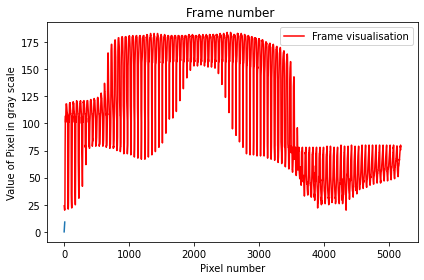

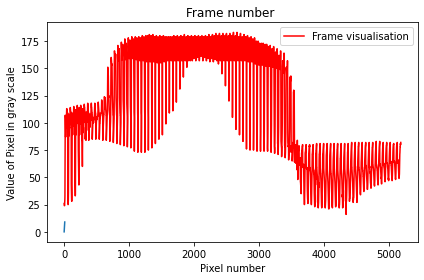

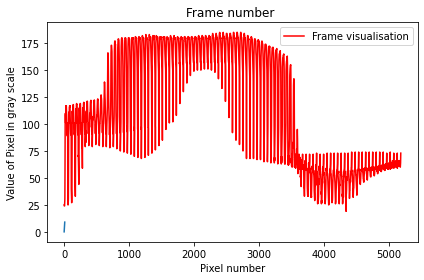

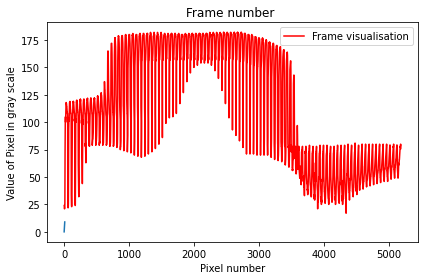

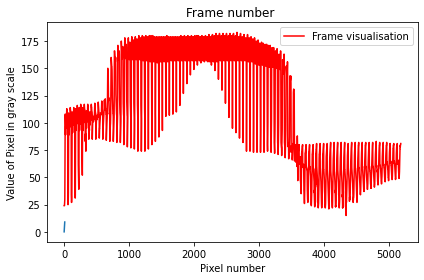

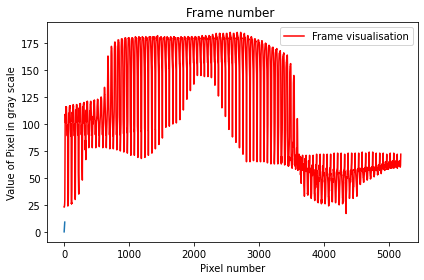

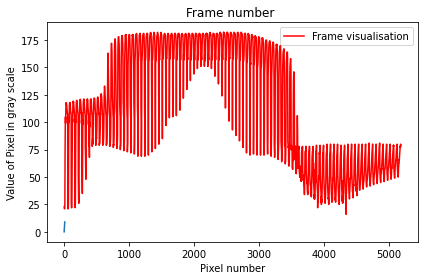

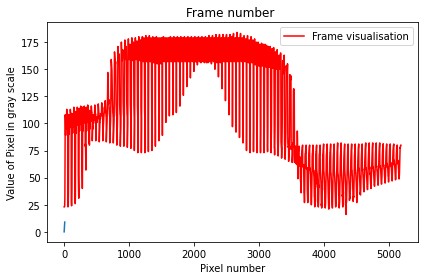

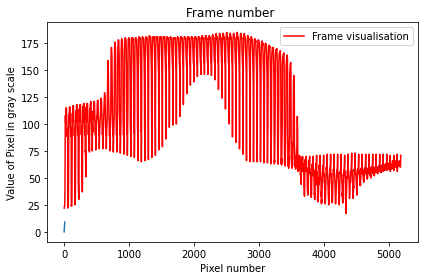

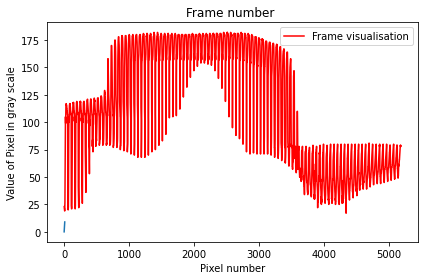

list for percent brightness [0.7101449275362319, 0.7, 0.6901408450704225, 0.6575342465753424, 0.5921052631578947, 0.48466257668711654, 0.3224043715846995, 0.22613065326633167, 0.21782178217821782, 0.22167487684729065, 0.23671497584541062, 0.26851851851851855, 0.35802469135802467, 0.384, 0.3937007874015748, 0.4094488188976378, 0.41732283464566927, 0.42857142857142855, 0.4308300395256917, 0.4365079365079365, 0.448, 0.4538152610441767, 0.4596774193548387, 0.46184738955823296, 0.4523809523809524, 0.4409448818897638, 0.42412451361867703, 0.4, 0.3787878787878788, 0.33088235294117646, 0.26573426573426573, 0.23972602739726026, 0.1986754966887417, 0.15654952076677317, 0.12074303405572756, 0.09969788519637462, 0.08656716417910448, 0.08383233532934131, 0.08656716417910448, 0.08333333333333333, 0.08656716417910448, 0.08982035928143713, 0.09309309309309309, 0.10975609756097561, 0.14733542319749215, 0.19218241042345277, 0.25170068027210885, 0.31899641577060933, 0.34317343173431736, 0.375939849624060

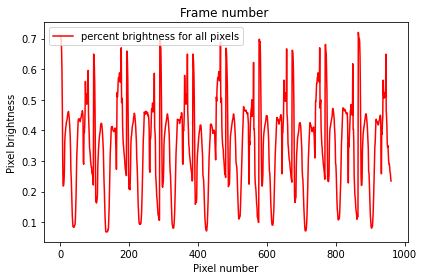

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


address is/content/drive/My Drive/videos/level-3/IMG_7439.MOV
is cam opened= True
True
True
True
True
True
True
True
True
True
True
address is/content/drive/My Drive/videos/level-3/2a100V.MOV
is cam opened= True
True
True
True
True
True
True
True
True
True
True
address is/content/drive/My Drive/videos/level-3/3a100V.MOV
is cam opened= True
True
True
True
True
True
True
True
True
True
True
address is/content/drive/My Drive/videos/level-3/IMG_7431.MOV
is cam opened= True
True
True
True
True
True
True
True
True
True
True
address is/content/drive/My Drive/videos/level-3/IMG_7440.MOV
is cam opened= True
True
True
True
True
True
True
True
True
True
True
address is/content/drive/My Drive/videos/level-3/IMG_9852.MOV
is cam opened= True
True
True
True
True
True
True
True
True
True
True
address is/content/drive/My Drive/videos/level-2/1a100V.MOV
is cam opened= True
True
True
True
True
True
True
True
True
True
True
address is/content/drive/My Drive/videos/level-2/IMG_0559.MOV
is cam opened= True


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
print("hi")

videoNames3=['IMG_7439.MOV','2a100V.MOV','3a100V.MOV','IMG_7431.MOV','IMG_7440.MOV','IMG_9852.MOV']
videoNames2=['1a100V.MOV','IMG_0559.MOV','IMG_0560.MOV','IMG_0561.MOV','IMG_0562.MOV','IMG_0563.MOV']
videoNames1=['4a100V.MOV','IMG_4909.mp4','IMG_5961.MOV','IMG_5962.MOV','4.wmv','IMG_4920.MOV']
videoNames0=['IMG_4910.mp4','IMG_5959.MOV','IMG_5960.MOV','IMG_7433.MOV','IMG_9851.MOV','IMG-3466.MOV']

testAllVideosResult=fnDataProcessing(['videoNames2'],'2',False)
allVideosResult3=fnDataProcessing(videoNames3,'3',True)
allVideosResult2=fnDataProcessing(videoNames2,'2',True)
allVideosResult1=fnDataProcessing(videoNames1,'1',True)
allVideosResult0=fnDataProcessing(videoNames0,'0',True)

print(testAllVideosResult.shape,"is the shape of my test data")


In [ ]:
arr = np.arange(9).reshape((3, 3))
print(arr)
np.random.shuffle(arr)
print(arr)
arr=np.array([  3 ,  2 ,  2   ,1 ,254, 254 ,253 ,253, 254 ,254])
arr=np.append(arr,2)
print(arr)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[  3   2   2   1 254 254 253 253 254 254   2]


In [ ]:
# print(testAllVideosResult)
np.random.shuffle(testAllVideosResult)
c=1
lst=[]
for each in allVideosResult2:
  each=np.append(each,2)
  lst.append(each)
  
  c=c+1
  if(c>31098/2):
    break

# print(lst)
testTrainDataset=np.array(lst)
print(testTrainDataset)


[[ 10  11  12 ...  18  19   2]
 [ 20  21  22 ...  28  29   2]
 [ 30  31  32 ...  38  39   2]
 ...
 [255   1   4 ...   3   2   2]
 [  1 254 254 ... 254 254   2]
 [254 254 254 ...   1   3   2]]


In [ ]:
print(allVideosResult3)
print(allVideosResult3.shape)
print(allVideosResult2)
print(allVideosResult2.shape)

np.random.shuffle(allVideosResult2)
np.random.shuffle(allVideosResult0)
np.random.shuffle(allVideosResult1)
np.random.shuffle(allVideosResult3)

c=1
lst=[]
print(allVideosResult2[0])
print("type of ",type(allVideosResult2[0]))
for each in allVideosResult2:
  each=np.append(each,2)
  lst.append(each)
  
  c=c+1
  if(c>31098/2):
    break
 
c=1
for each in allVideosResult3:
  each=np.append(each,3)
  lst.append(each)
  c=c+1
  if(c>31098/2):
    break
c=1
for each in allVideosResult1:
  each=np.append(each,1)
  lst.append(each)
  c=c+1
  if(c>31098/2):
    break
c=1
for each in allVideosResult0:
  each=np.append(each,0)
  lst.append(each)
  c=c+1
  if(c>31098/2):
    break
trainDataset=np.array(lst)
print("train dataset is -")

print(trainDataset.shape)
print("^^^^^^^^^^")
# print(trainDataset)
np.random.shuffle(trainDataset)
print(trainDataset.shape)

[[ 10  11  12 ...  17  18  19]
 [ 20  21  22 ...  27  28  29]
 [ 30  31  32 ...  37  38  39]
 ...
 [  7   6   4 ... 251 251 249]
 [248 250 249 ... 251 255   1]
 [  4   6  10 ...   7   6   4]]
(31098, 10)
[[ 10  11  12 ...  17  18  19]
 [ 20  21  22 ...  27  28  29]
 [ 30  31  32 ...  37  38  39]
 ...
 [  0 255   3 ...   3   2   2]
 [  1 255 253 ... 254 254 254]
 [255 255 254 ... 255   1   3]]
(31098, 10)
[244 248 246 245 244 244 244 244 243 245]
type of  <class 'numpy.ndarray'>
train dataset is -
(62196, 11)
^^^^^^^^^^
(62196, 11)


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
print(trainDataset)
print(allVideosResult3)


[[   3  255  250 ...  251  251    1]
 [ 244  248  251 ...    6    7    3]
 [3670 3671 3672 ... 3678 3679    0]
 ...
 [  23   16  243 ...  242  241    2]
 [ 242  244  249 ...   34   34    2]
 [   0    0    0 ...  255    0    0]]
[[219 222 234 ...  14  26  35]
 [ 33   7 238 ... 173 173 175]
 [240 247   1 ...  45  45  42]
 ...
 [229 217 233 ...  11  31  35]
 [236 223 219 ... 209 208 211]
 [215 210 208 ... 218 224 231]]


In [ ]:
# nparr=np.zeros((1,10))
# print(finalResult[0])
# print(nparr)
# nparr=np.append(nparr,finalResult[0])
# nparr=np.append(nparr,finalResult[1])
# print(nparr.shape)

In [ ]:
Xtesting=testTrainDataset
new=[]
for each in testTrainDataset:
  each = each[:-1]
  new.append(each)
Xtesting=np.array(new)
print(Xtesting)

[[ 10  11  12 ...  17  18  19]
 [ 20  21  22 ...  27  28  29]
 [ 30  31  32 ...  37  38  39]
 ...
 [255   1   4 ...   3   3   2]
 [  1 254 254 ... 254 254 254]
 [254 254 254 ...   0   1   3]]


In [ ]:
X=trainDataset
y=[]
for each in X:
  y.append(each[-1])

y=np.array(y)
print(y.shape)
print(y)
new = []
for each in trainDataset:
  each = each[:-1]
  new.append(each)
X=np.array(new)
print(X)



(62196,)
[1 3 0 ... 2 2 0]
[[   3  255  250 ...  253  251  251]
 [ 244  248  251 ...    5    6    7]
 [3670 3671 3672 ... 3677 3678 3679]
 ...
 [  23   16  243 ...  241  242  241]
 [ 242  244  249 ...   14   34   34]
 [   0    0    0 ...    0  255    0]]


In [ ]:
from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train=X
y_train=y

In [ ]:
def findMyLevel(y_pred):
  one=two=three=zero=nothing=0
  for each in y_pred:

    if each==1:
      one=one+1
    elif each==2 :
      two=two+1
    elif each==3:
      three=three+1
    elif each==0:
      zero=zero+1
    else:
      nothing=nothing+1
  
  levels={}
  levels['zero']=zero
  levels['one']=one
  levels['two']=two
  levels['three']=three
  print("ones=",one, " twos =",two, " three=", three," zero=", zero,"nothing",nothing)
  maxLevels=max(one,two,zero,three)
  for key in levels:
    if(levels.get(key)==maxLevels):
      levelFound=key
  levelConfidence=findConfidence(levels,levelFound)
  print("The flicker level of your bulb is",levelFound)
  # percentageFlicker=getPercentFlicker()
  return (levelFound,levelConfidence)

In [ ]:
def findConfidence(levels,levelFound):
  s=0
  for key in levels:
    s=levels.get(key)+s
  
 
  print("sum is",s)
  # displayConfidence(levels)
  print("There is a confidence level of",levels.get(levelFound)/s)
  return (levels.get(levelFound))/s

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def displayConfidence(levels):
  print("levels",levels)
  y=[]
  for key in levels:
    y.append(levels.get(key))
  y=np.array(y)
  fig, ax = plt.subplots()
  
  for item in [fig, ax]:

    item.patch.set_visible(False)
  colors=cm.hsv(y/float(max(y)))
  plot=plt.scatter(y,y,c=y,cmap='hsv')
  plt.clf()
  plt.colorbar(plot)
  plt.bar(range(len(y)),y,color=colors)
  plt.show()
  

In [ ]:
X_test_testdata=Xtesting

print("original X shape=",X.shape)
# print(" x test shapoe",X_test.shape)
print("X test data my testing shape=",X_test_testdata.shape)

original X shape= (62196, 10)
X test data my testing shape= (15549, 10)


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier 

# def displayKNNAccuracy(X_train,y_train,X_test,y_test):
#   no_neighbors = np.arange(1, 9)
#   train_accuracy = np.empty(len(no_neighbors))
#   test_accuracy = np.empty(len(no_neighbors)) 
#   for i, k in enumerate(no_neighbors):
#     # We instantiate the classifier
#     knn = KNeighborsClassifier(n_neighbors=k)
#     # Fit the classifier to the training data
#     knn.fit(X_train,y_train)
    
#     # Compute accuracy on the training set
#     train_accuracy[i] = knn.score(X_train, y_train)

#     # Compute accuracy on the testing set
#     test_accuracy[i] = knn.score(X_test, y_test)
#   fig, ax = plt.subplots()
  
#   for item in [fig, ax]:

#     item.patch.set_visible(False)
#   plt.title('KNN"')
#   plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
#   plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
#   plt.legend()
#   plt.xlabel('Number of Neighbors')
#   plt.ylabel('Accuracy')
#   plt.show()

In [ ]:
def runKnn():
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=3, p=1, metric='minkowski')
  knn.fit(X_train, y_train)

  # print("Accuracy score:", knn.score(X_test, y_test))


  y_pred=knn.predict(X_test_testdata)
  # displayKNNAccuracy(X_train,y_train,X_test_testdata,y_pred)
  print(X_test_testdata.shape)
  print("prediction is")
  print(y_pred)
  (levelFound,levelConfidence)=findMyLevel(y_pred)
  # print('Misclassified test samples:', (y_test != y_pred).sum())
  lst=[]
  if levelFound=='zero':
    lst.append(0)
  elif levelFound=='one':
    lst.append(1)
  elif levelFound=='two':
    lst.append(2)
  else:
    lst.append(3)


  lst.append(levelConfidence)
  return lst


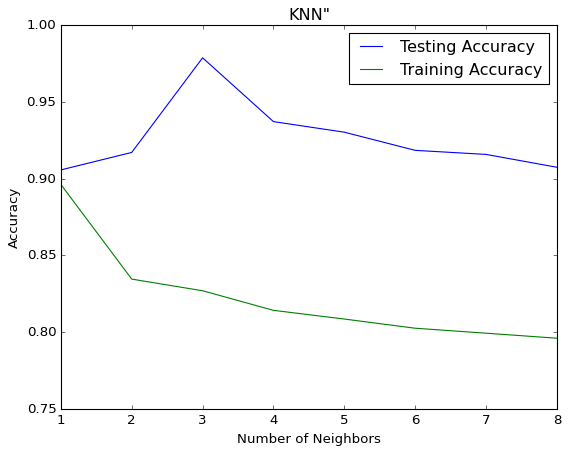

(15549, 10)
prediction is
[2 2 1 ... 2 2 2]
ones= 890  twos = 13304  three= 474  zero= 881 nothing 0
sum is 15549
There is a confidence level of 0.8556177246125153
The flicker level of your bulb is two


[2, 0.8556177246125153]

In [ ]:
runKnn()

In [ ]:
# !pip install flask
# !pip install pyngrok
!pip install colabcode
!pip install fastapi

     |████████████████████████████████| 747kB 7.5MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 8.3MB 11.4MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 430kB 45.7MB/s 
     |████████████████████████████████| 378kB 51.9MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 122kB 49.6MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=382c8389727be2e4700fb8ffdc2b988def73eef0825ec1b656cd80e5adb6540c
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation:

     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 10.1MB 10.4MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 


In [ ]:
import pickle
Pkl_Filename = "model_knn.pkl" 
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn, file)

In [ ]:
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("model_knn.pkl", "rb"))

@app.get('/')
def index():
    lst=runKnn()
    return {'message': lst}

# @app.post('/')
# async def root(request: Request):
#   print(request.json())

#   return await request.json()


In [ ]:
from colabcode import ColabCode
server = ColabCode(port=5000, code=False)

In [ ]:
server.run_app(app=app)

Public URL: NgrokTunnel: "http://aef21259f8e3.ngrok.io" -> "http://localhost:5000"


INFO:     Started server process [59]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:5000 (Press CTRL+C to quit)


(15549, 10)
prediction is
[2 2 1 ... 2 2 2]
ones= 890  twos = 13304  three= 474  zero= 881 nothing 0
sum is 15549
There is a confidence level of 0.8556177246125153
The flicker level of your bulb is two
INFO:     58.176.174.95:0 - "GET / HTTP/1.1" 200 OK
INFO:     58.176.174.95:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
(15549, 10)
prediction is
[2 2 1 ... 2 2 2]
ones= 890  twos = 13304  three= 474  zero= 881 nothing 0
sum is 15549
There is a confidence level of 0.8556177246125153
The flicker level of your bulb is two
INFO:     58.176.174.95:0 - "GET / HTTP/1.1" 200 OK
(15549, 10)
prediction is
[2 2 1 ... 2 2 2]
ones= 890  twos = 13304  three= 474  zero= 881 nothing 0
sum is 15549
There is a confidence level of 0.8556177246125153
The flicker level of your bulb is two
INFO:     58.176.174.95:0 - "GET / HTTP/1.1" 200 OK


In [ ]:
from pyngrok import ngrok
ngrok.kill()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix




# lr = LogisticRegression(C=30.0, solver='liblinear')
lr = LogisticRegression(C=20.0, solver='lbfgs')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
print('Misclassified training samples:',(y_train != y_pred).sum())

y_pred = lr.predict(X_test)
# print('Misclassified test samples:', (y_test != y_pred).sum())

print("Accuracy score:", lr.score(X_test, y_test))

Misclassified training samples: 34230
Accuracy score: 0.30562700964630224


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=13, random_state=1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
print('Misclassified training samples:',(y_train!=y_pred).sum())

y_pred = tree.predict(X_test)
print('Misclassified samples:', (y_test != y_pred).sum())

print("Accuracy score:", tree.score(X_test, y_test))

Misclassified training samples: 8846
Misclassified samples: 3292
Accuracy score: 0.7353697749196142


In [ ]:
# import os
# import threading

# from flask import Flask
# from pyngrok import ngrok


# os.environ["FLASK_ENV"] = "development"

# app = Flask(__name__)

# # Open a ngrok tunnel to the HTTP server
# public_url = ngrok.connect(5000).public_url

# print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}/\"".format(public_url, 5000))

# # Update any base URLs to use the public ngrok URL
# app.config["BASE_URL"] = public_url

# # ... Update inbound traffic via APIs to use the public-facing ngrok URL

# # ngrok.disconnect("http://457ddeb98145.ngrok.io")
# # Define Flask routes
# @app.route("/")
# def index():
#     return "Hello from Colab- Anirudh!!"

# # Start the Flask server in a new thread
# threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, 
                                random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

# y_pred = forest.predict(X_train)
# print('Misclassified training samples:',(y_train!=y_pred).sum())

y_pred = forest.predict(X_test_testdata)
# print('Misclassified test samples:', (y_test != y_pred).sum())

# print("Accuracy score:", forest.score(X_test, y_test))
print(X_test_testdata.shape)
print("prediction is")
print(y_pred)
findMyLevel(y_pred)


(15549, 10)
prediction is
[2 0 1 ... 2 2 2]
ones= 880  twos = 13591  three= 638  zero= 440 nothing 0
sum is 15549
There is a confidence level of 0.8740755032477973
The flicker level of your bulb is two


('two', 0.8740755032477973)

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)



# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2529742765273312


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
learning_rate=0.5
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.5
Accuracy score (training): 0.698
Accuracy score (validation): 0.696


In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_test, y_test)
print("Accuracy score=",score)

Accuracy score= 0.7146302250803859
